In [14]:
pip install scikit-learn pandas matplotlib

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [23]:
# Replace 'dataset.csv' with your dataset file path
df = pd.read_csv('/content/Housing.csv')

In [24]:
print(df.head())         # First 5 rows
print(df.info())         # Summary of data types and non-null counts
print(df.describe())     # Statistical summary of numeric columns

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [38]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [77]:
# Convert categorical variables to dummy/indicator variables
df_encoded = pd.get_dummies(df, drop_first=True)

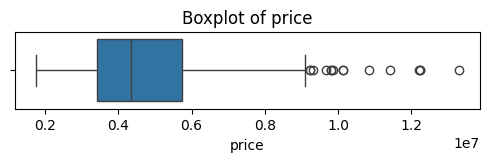

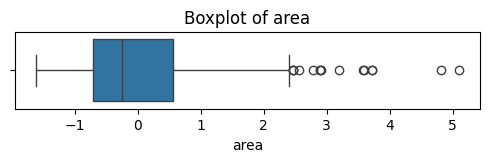

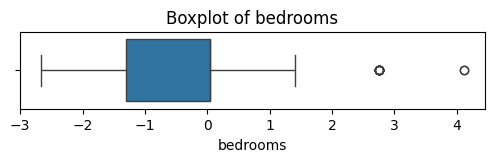

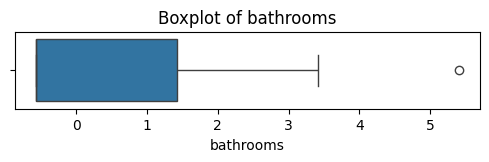

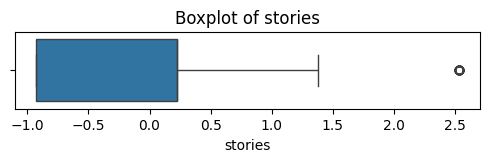

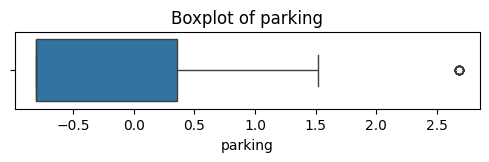

In [78]:
# Visualize numeric columns using boxplots
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numerical_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(data=df_encoded, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers using IQR for each column
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df_encoded, numerical_cols)

In [79]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_cleaned.drop("price", axis=1)
y = df_cleaned["price"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 704466.391326915
Mean Squared Error (MSE): 1074203165776.4407
R² Score: 0.49653192800568013


In [59]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

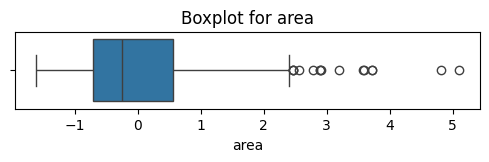

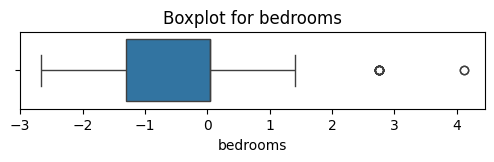

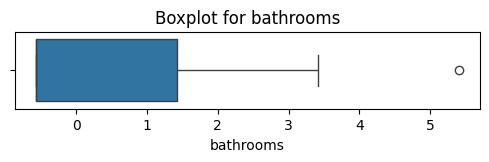

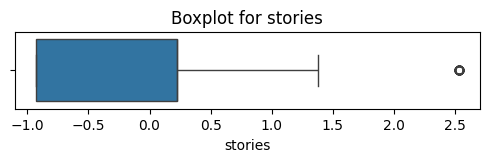

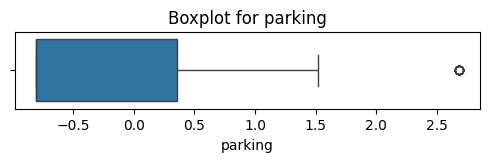

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [61]:
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply to the dataframe
df_clean = remove_outliers(df, numerical_cols)

In [62]:
print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_clean.shape}")

Original dataset size: (545, 13)
Cleaned dataset size: (469, 13)


In [63]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [64]:
X = df_processed.drop('price', axis=1)
y = df_processed['price']

In [65]:
print(X.head())
print(y.head())

       area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  1.046726  1.403419   1.421812  1.378217  1.517692          True   
1  1.757010  1.403419   5.405809  2.532024  2.679409          True   
2  2.218232  0.047278   1.421812  0.224410  1.517692          True   
3  1.083624  1.403419   1.421812  0.224410  2.679409          True   
4  1.046726  1.403419  -0.570187  0.224410  1.517692          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True                          

In [66]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from preprocessing step

# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes to confirm split
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (436, 13)
Testing features shape: (109, 13)
Training labels shape: (436,)
Testing labels shape: (109,)


In [67]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Check the intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 4002422.1604061155
Coefficients: [ 511615.56377666   56615.57245779  549420.50124098  353158.42985604
  193542.78167455  367919.94767957  231610.03717565  390251.17618109
  684649.88533879  791426.73584319  629890.56531336 -126881.81758511
 -413645.06222822]


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 970043.4039201644
Mean Squared Error (MSE): 1754318687330.6685
R^2 Score: 0.6529242642153175


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # alpha is regularization strength, tune it later
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R^2:", r2_score(y_test, y_pred_ridge))

Ridge MAE: 969857.902847826
Ridge MSE: 1754839327446.8079
Ridge R^2: 0.6528212603810124


In [71]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = Ridge(alpha=1.0)
model.fit(X_train_poly, y_train)
y_pred_poly = model.predict(X_test_poly)

print("Poly Ridge MAE:", mean_absolute_error(y_test, y_pred_poly))
print("Poly Ridge MSE:", mean_squared_error(y_test, y_pred_poly))
print("Poly Ridge R^2:", r2_score(y_test, y_pred_poly))

Poly Ridge MAE: 1033724.0967791403
Poly Ridge MSE: 1899687590588.9485
Poly Ridge R^2: 0.6241643704611504


In [72]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("Tuned Ridge MAE:", mean_absolute_error(y_test, y_pred_best))
print("Tuned Ridge MSE:", mean_squared_error(y_test, y_pred_best))
print("Tuned Ridge R^2:", r2_score(y_test, y_pred_best))

Best alpha: {'alpha': 10}
Tuned Ridge MAE: 968319.3725442478
Tuned Ridge MSE: 1760077525667.3762
Tuned Ridge R^2: 0.6517849312837285


In [73]:
import numpy as np

# Correlation matrix
corr_matrix = pd.DataFrame(X_train_scaled, columns=X.columns).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features to drop:", to_drop)

Highly correlated features to drop: []


In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())

Cross-validated MSE: 1059768849845.4545


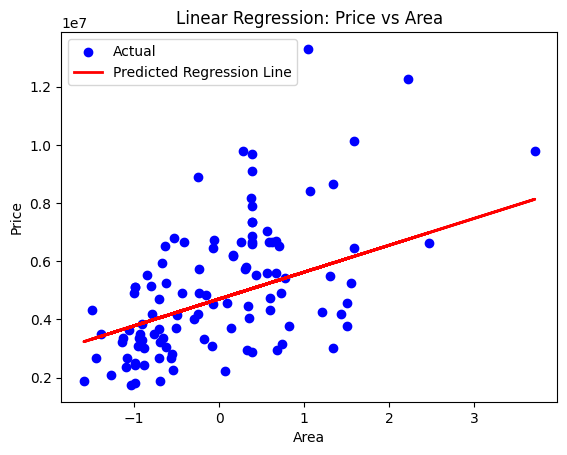

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Use only one feature for simplicity
X_train_area = X_train[['area']]
X_test_area = X_test[['area']]

# Fit linear regression on that feature
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_area, y_train)

# Predict on test set
y_pred = model.predict(X_test_area)

# Scatter plot actual data
plt.scatter(X_test_area, y_test, color='blue', label='Actual')

# Plot regression line
plt.plot(X_test_area, y_pred, color='red', linewidth=2, label='Predicted Regression Line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Area')
plt.legend()
plt.show()

In [76]:
print(f"Intercept (b0): {model.intercept_}")
print(f"Coefficient (b1 for area): {model.coef_[0]}")

'''Intercept (b0) = Predicted price when area = 0.

Coefficient (b1) = For every 1 unit increase in area, price increases by b1 units on average, assuming other factors are constant.'''

Intercept (b0): 4704993.390867693
Coefficient (b1 for area): 923045.7963431852


'Intercept (b0) = Predicted price when area = 0.\n\nCoefficient (b1) = For every 1 unit increase in area, price increases by b1 units on average, assuming other factors are constant.'